**#CASO DE ESTUDIO**

Para este proyecto, visualizarás los datos de las series temporales utilizando un gráfico de líneas, un gráfico de barras y un gráfico de cajas. Utilizarás Pandas, Matplotlib y Seaborn para visualizar un conjunto de datos que contiene el número de vistas diarias en la página del foro de freeCodeCamp.org del 2016-05-09 al 2019-12-03.

**Se necesita:**

1. Usa Pandas para importar los datos desde "fcc-forum-pageviews.csv". Establece el índice para la columna date.
2. Limpiar los datos filtrando los días en que las vistas de la página se encuentran en el 2,5% superior del conjunto de datos o en el 2,5% inferior del conjunto de datos.
3. Crea una función llamada draw_line_plot que utilice Matplotlib para dibujar un gráfico de línea similar a "examples/Figure_1.png". El título debe ser Daily freeCodeCamp Forum Page Views 5/2016-12/2019. La etiqueta en el eje x debe ser Date y la etiqueta en el eje y debe ser Page Views.
4. Crea una función llamada draw_bar_plot que dibuje un gráfico de barras similar a "examples/Figure_2.png". Debe mostrar el número promedio de vistas diarias de cada mes, agrupadas por año. La leyenda debe mostrar las etiquetas de los meses y tener un título de Months. En el gráfico, la etiqueta en el eje x debe ser Years y la etiqueta en el eje y debe ser Average Page Views.
5. Crea una función llamada draw_box_plot que utilice Seaborn para dibujar dos diagramas de caja adyacentes similares a "examples/Figure_3.png". Estos diagramas de caja deben mostrar cómo se distribuyen los valores dentro de un año o mes determinado y cómo se compara con el tiempo. El título del primer gráfico debe ser Year-wise Box Plot (Trend) y el título del segundo gráfico debe ser Month-wise Box Plot (Seasonality). Asegúrese de que las etiquetas de los meses en la parte inferior comiencen en Jan y que los ejes x e y estén etiquetados correctamente

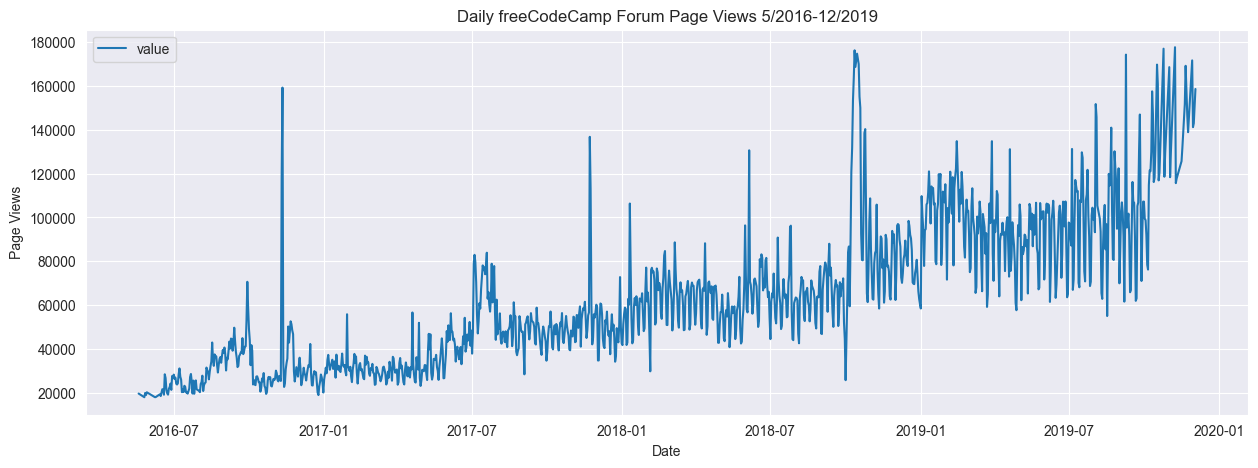

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('data/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]
months=['January', 'February', 'March', 'April', 'May', 'June', 'July',
     'August', 'September', 'October', 'November', 'December']

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.lineplot(data = df, legend="brief")
    ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set(xlabel = "Date",ylabel = "Page Views")
    fig.savefig('images/line_plot.png')
    return fig
fig = draw_line_plot()

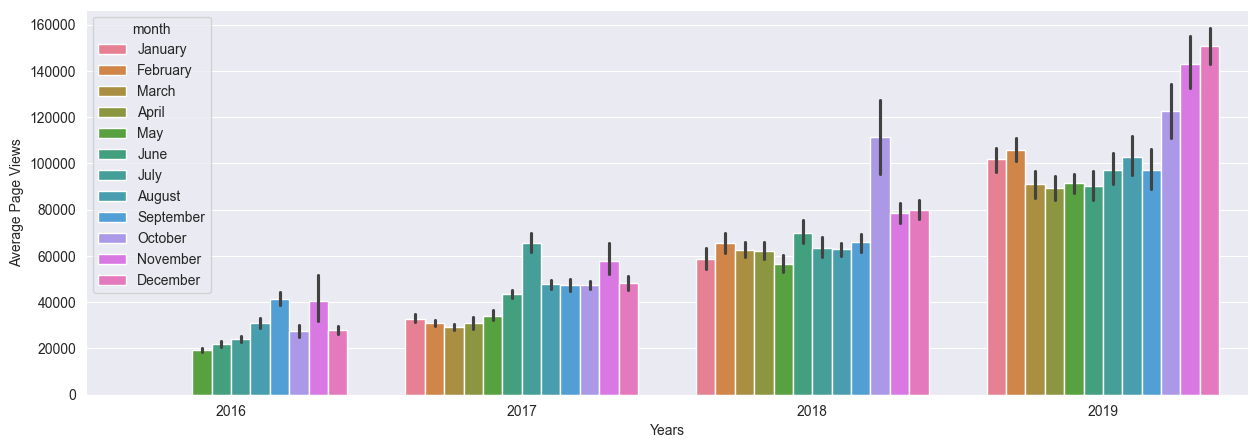

In [7]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df.index.year
    df_bar["month"] = df.index.month_name()
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.barplot(x="year", hue="month", y="value", data=df_bar, hue_order = months)
    ax.set(xlabel = "Years",ylabel = "Average Page Views")
    fig.savefig('images/bar_plot.png')
    return fig
fig = draw_bar_plot()

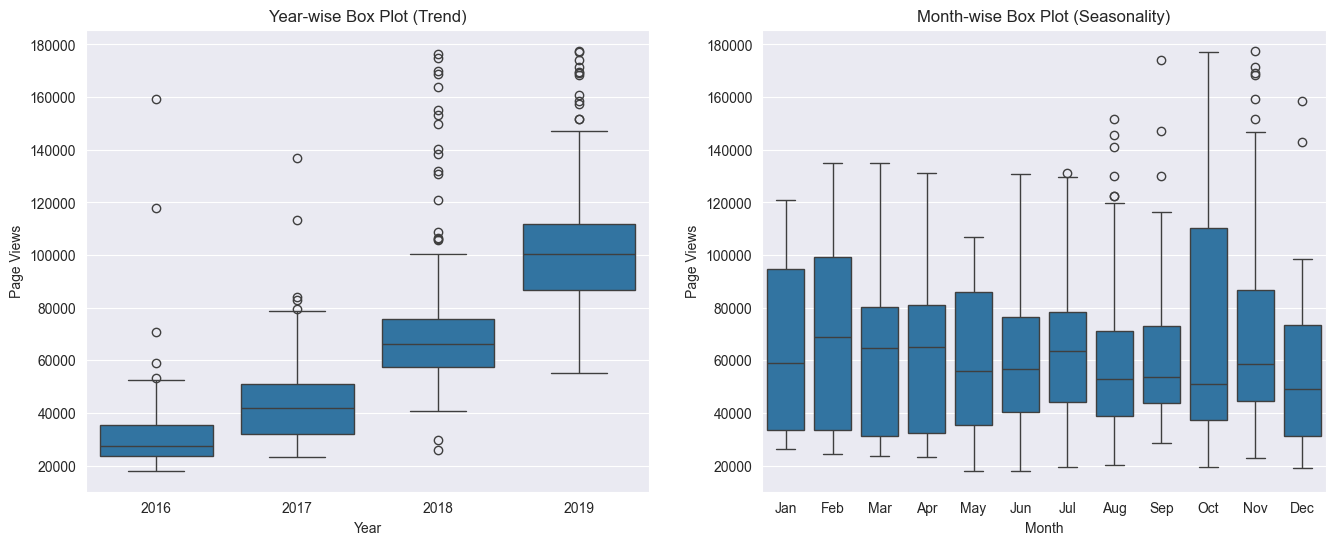

In [8]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    df_box['monthnumber'] = df.index.month
    df_box = df_box.sort_values('monthnumber')
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] )
    ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
    ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
    fig.savefig('images/box_plot.png')
    return fig
fig = draw_box_plot()